<h4> Создание датасетов

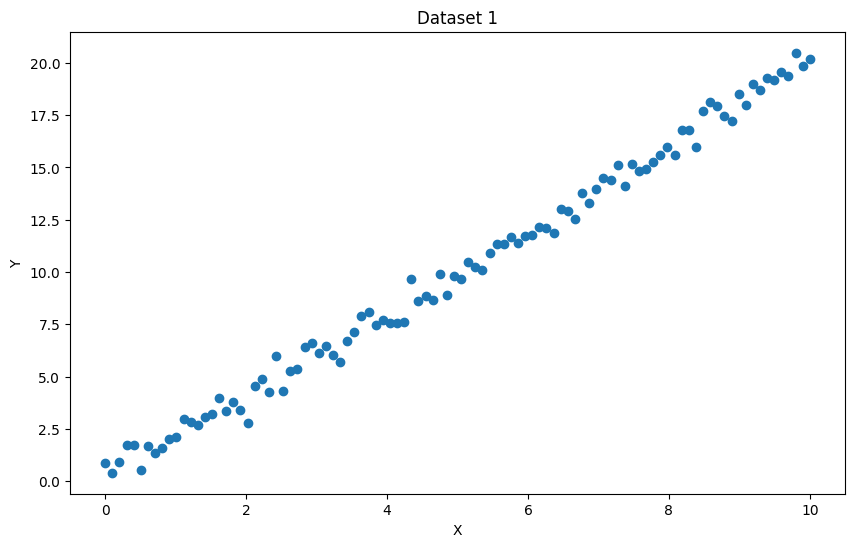

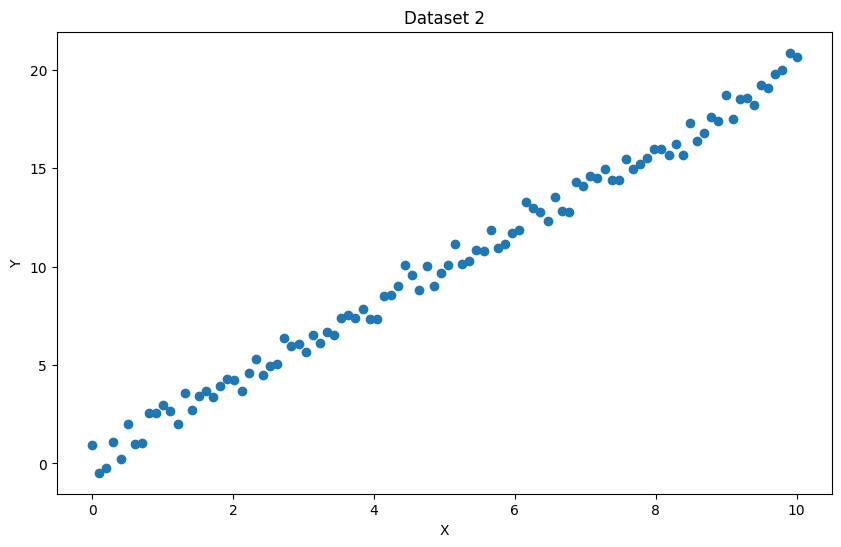

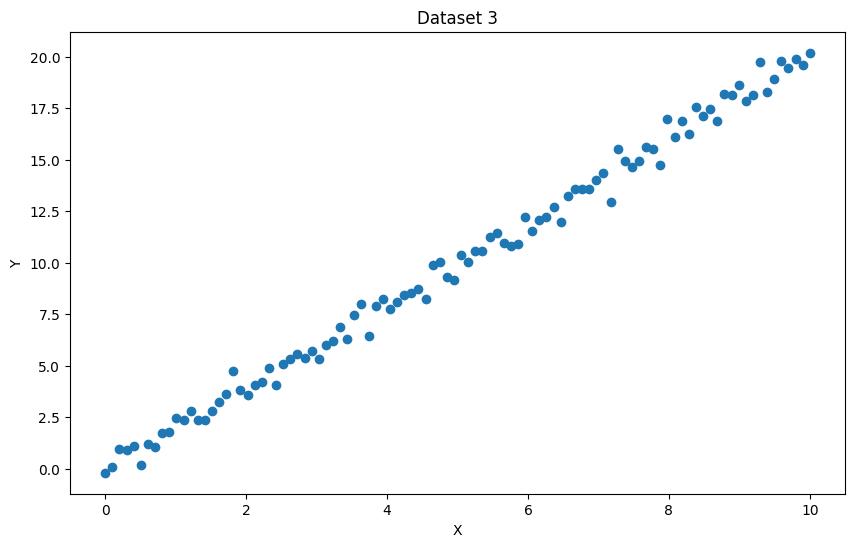

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Создаем три датасета с качественными данными
np.random.seed(0)
xs = np.linspace(0, 10, 100)
data1 = pd.DataFrame({'x': xs, 'y': 2 * (xs) + np.random.normal(0, 0.5, 100)})
data2 = pd.DataFrame({'x': xs, 'y': 2 * (xs) + np.random.normal(0, 0.5, 100)})
data3 = pd.DataFrame({'x': xs, 'y': 2 * (xs) + np.random.normal(0, 0.5, 100)})

# Выводим датасеты
for i, df in enumerate([data1, data2, data3], start=1):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['x'], df['y'])
    plt.title(f"Dataset {i}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

<h4> Обучение модели на одном из датасетов

In [92]:
# Обучаем модель на первом датасете
model = LinearRegression().fit(data1[['x']], data1['y'])

# Предсказываем значения
predictions = model.predict(data1[['x']])

<h4> Создание датасета с шумом

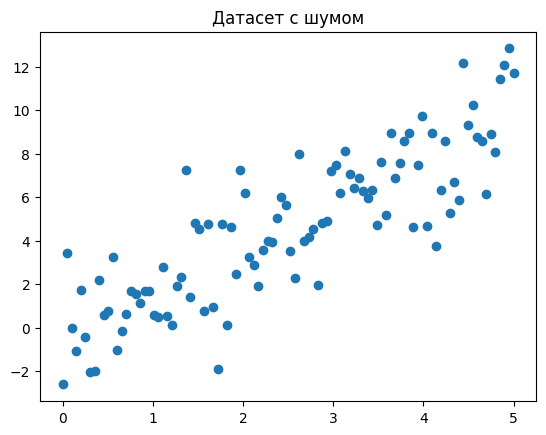

In [93]:
# Создаем датасет с шумом
noise_data = pd.DataFrame({'x': np.linspace(0, 5, 100), 'y': (xs) + np.random.normal(0, 2, 100)})

# Визуализация датасета с шумом
plt.scatter(noise_data['x'], noise_data['y'])
plt.title('Датасет с шумом')
plt.show()

<h4> Тестирование работы модели на разных датасетах

In [94]:
import ipytest
ipytest.autoconfig()

In [95]:
%%ipytest
@pytest.mark.parametrize("data, expected_mse", [
    (data1, 1),
    (data2, 1),
    (data3, 1),
    (noise_data, 1)
])

def test_model_mse(data, expected_mse):
    mse = mean_squared_error(data['y'], predictions)
    assert mse < expected_mse

...F                                                                                         [100%]
============================================ FAILURES =============================================
_____________________________________ test_model_mse[data3-1] _____________________________________

data =            x          y
0   0.000000  -2.613054
1   0.050505   3.417271
2   0.101010  -0.034308
3   0.151515  -1.05732...96  4.848485  11.412818
97  4.898990  12.080184
98  4.949495  12.832147
99  5.000000  11.705104

[100 rows x 2 columns]
expected_mse = 1

    @pytest.mark.parametrize("data, expected_mse", [
        (data1, 1),
        (data2, 1),
        (data3, 1),
        (noise_data, 1)
    ])
    
    def test_model_mse(data, expected_mse):
        mse = mean_squared_error(data['y'], predictions)
>       assert mse < expected_mse
E       assert 40.681987231412 < 1

C:\Users\Alex\AppData\Local\Temp\ipykernel_10536\3821656145.py:10: AssertionError
===============================

In [96]:
%%ipytest
@pytest.mark.parametrize("data, expected_r2", [
    (data1, 0.9),
    (data2, 0.9),
    (data3, 0.9),
    (noise_data, 0.9)
])
def test_model_r2(data, expected_r2):
    r2 = r2_score(data['y'], predictions)
    assert r2 > expected_r2

...F                                                                                         [100%]
============================================ FAILURES =============================================
____________________________________ test_model_r2[data3-0.9] _____________________________________

data =            x          y
0   0.000000  -2.613054
1   0.050505   3.417271
2   0.101010  -0.034308
3   0.151515  -1.05732...96  4.848485  11.412818
97  4.898990  12.080184
98  4.949495  12.832147
99  5.000000  11.705104

[100 rows x 2 columns]
expected_r2 = 0.9

    @pytest.mark.parametrize("data, expected_r2", [
        (data1, 0.9),
        (data2, 0.9),
        (data3, 0.9),
        (noise_data, 0.9)
    ])
    def test_model_r2(data, expected_r2):
        r2 = r2_score(data['y'], predictions)
>       assert r2 > expected_r2
E       assert -2.2805352570021014 > 0.9

C:\Users\Alex\AppData\Local\Temp\ipykernel_10536\320565435.py:9: AssertionError
===================================== s

Что и требовалось доказать. Проблема на датасете с шумом обнаружена на стадии тестирования. 